In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns

In [4]:
df = pd.read_csv("Ecommerce Customers")
df.head(3)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [7]:
df.keys()

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [59]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

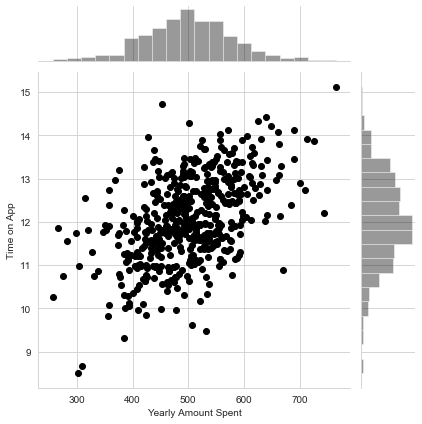

In [60]:
sns.jointplot('Yearly Amount Spent','Time on App',df,color='k')

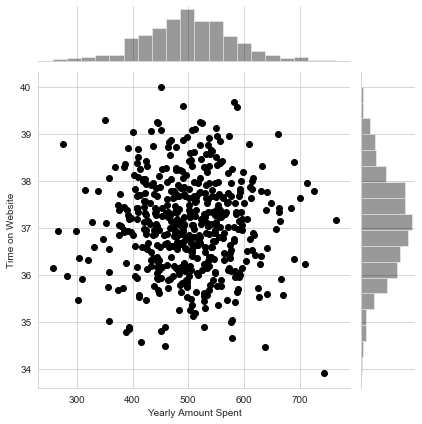

In [61]:
sns.jointplot('Yearly Amount Spent','Time on Website',df,color='k')


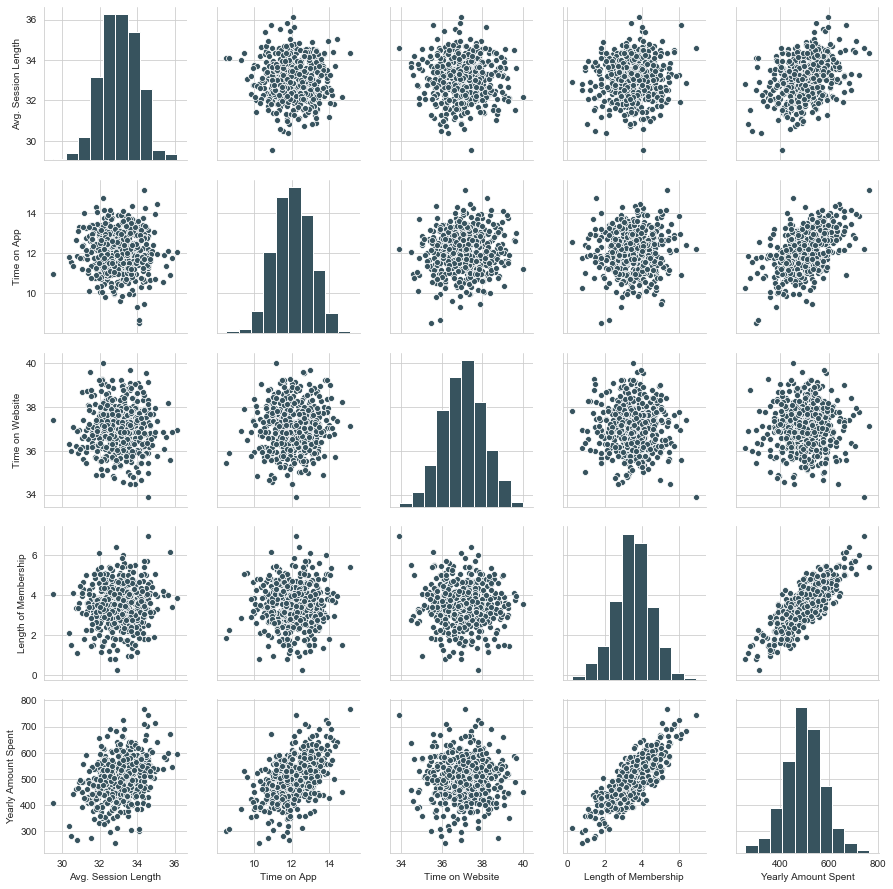

In [62]:
sns.pairplot(df)

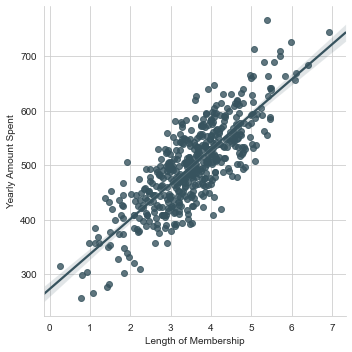

In [63]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=df)

In [30]:
X = df.iloc[:,[3,4,5,6]]
y = df.iloc[:,-1]

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=33)

In [33]:
lm = LinearRegression()

In [40]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
y_pred = lm.predict(X_test)

In [53]:
lm_cofee = pd.DataFrame(lm.coef_,X.columns,columns=['Co-eff'])
lm_cofee

,Co-eff
Avg. Session Length,25.492034
Time on App,38.273299
Time on Website,-0.080033
Length of Membership,61.801190


In [48]:
print(lm.intercept_)

-1019.6338145605293


In [54]:
r2_score(y_test,y_pred)

0.9852601233107491

Text(0, 0.5, 'y_pred')

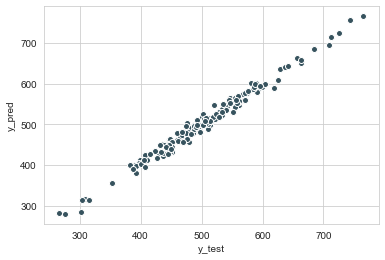

In [68]:
plt.scatter(y_test,y_pred,edgecolors='w')
plt.xlabel('y_test')
plt.ylabel('y_pred')

In [71]:
import numpy as np
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 8.394700978671219
MSE: 108.36582224001017
RMSE: 10.409890596928008
